In [ ]:

### retrive stock from cvs files

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path



### retrive stock from cvs files

In [2]:
# Read saved data
stock_GD_df = pd.read_csv("output_data/stock_GD.csv")
stock_RTX_df = pd.read_csv("output_data/stock_RTX.csv")
stock_LMT_df = pd.read_csv("output_data/stock_LMT.csv")
stock_SPY_df = pd.read_csv("output_data/stock_SPY.csv")


stock_GD_df = stock_GD_df.drop(columns=["Unnamed: 0"])
stock_RTX_df = stock_RTX_df.drop(columns=["Unnamed: 0"])
stock_LMT_df = stock_LMT_df.drop(columns=["Unnamed: 0"])
stock_SPY_df = stock_SPY_df.drop(columns=["Unnamed: 0"])


# Display sample data
print(stock_GD_df.head())
print(stock_RTX_df.head())
print(stock_LMT_df.head())
print(stock_SPY_df.head())

                       Date  Open_GD  Close_GD  Volume_GD Symbol_GD
0  2024-08-30T00:00:00+0000   297.53    299.36  1033038.0        GD
1  2024-08-29T00:00:00+0000   298.00    297.83  1640388.0        GD
2  2024-08-28T00:00:00+0000   290.99    296.64  1553612.0        GD
3  2024-08-27T00:00:00+0000   291.01    290.20  1005336.0        GD
4  2024-08-26T00:00:00+0000   292.45    291.00   814847.0        GD
                       Date  Open_RTX  Close_RTX  Volume_RTX Symbol_RTX
0  2024-08-30T00:00:00+0000    122.05     123.34   6371993.0        RTX
1  2024-08-29T00:00:00+0000    121.09     122.29   3547768.0        RTX
2  2024-08-28T00:00:00+0000    119.77     120.84   4287172.0        RTX
3  2024-08-27T00:00:00+0000    118.68     119.49   4101156.0        RTX
4  2024-08-26T00:00:00+0000    118.69     118.70   6260578.0        RTX
                       Date  Open_LMT  Close_LMT  Volume_LMT Symbol_LMT
0  2024-08-30T00:00:00+0000    564.97     568.10   1082809.0        LMT
1  2024-08-29T00

In [3]:
## Merge data
Merge_1 = pd.merge(stock_GD_df, stock_RTX_df, on = "Date")
Merge_2 = pd.merge(Merge_1, stock_LMT_df, on = "Date" )
stock_data_df = pd.merge(Merge_2, stock_SPY_df, on = "Date" )

stock_data_df.head()


,Date,Open_GD,Close_GD,Volume_GD,Symbol_GD,Open_RTX,Close_RTX,Volume_RTX,Symbol_RTX,Open_LMT,Close_LMT,Volume_LMT,Symbol_LMT,Open_SPY,Close_SPY,Volume_SPY,Symbol_SPY
0,2024-08-30T00:00:00+0000,297.53,299.36,1033038.0,GD,122.05,123.34,6371993.0,RTX,564.97,568.10,1082809.0,LMT,560.77,563.68,62700110.0,SPY
1,2024-08-29T00:00:00+0000,298.00,297.83,1640388.0,GD,121.09,122.29,3547768.0,RTX,564.00,566.85,662411.0,LMT,560.31,558.35,38681700.0,SPY
2,2024-08-28T00:00:00+0000,290.99,296.64,1553612.0,GD,119.77,120.84,4287172.0,RTX,562.20,563.98,829250.0,LMT,561.21,558.30,40869100.0,SPY
3,2024-08-27T00:00:00+0000,291.01,290.20,1005336.0,GD,118.68,119.49,4101156.0,RTX,559.45,560.41,749757.0,LMT,559.49,561.56,32526089.0,SPY
4,2024-08-26T00:00:00+0000,292.45,291.00,814847.0,GD,118.69,118.70,6260578.0,RTX,556.11,558.10,795353.0,LMT,563.18,560.79,32789693.0,SPY


In [4]:
## stock Volume

In [5]:
# calculate 50 days total trading volume
# Ensure the 'Date' column is in datetime format
stock_data_df['Date'] = pd.to_datetime(stock_data_df['Date'])

# Calculate the 50 days total trading volume
stock_data_df['50_days_volume_GD'] = stock_data_df['Volume_GD'].rolling(window=50).sum()
stock_data_df['50_days_volume_RTX'] = stock_data_df['Volume_RTX'].rolling(window=50).sum()
stock_data_df['50_days_volume_LMT'] = stock_data_df['Volume_LMT'].rolling(window=50).sum()


# Display the DataFrame with the new column
stock_data_df


,Date,Open_GD,Close_GD,Volume_GD,Symbol_GD,Open_RTX,Close_RTX,Volume_RTX,Symbol_RTX,Open_LMT,Close_LMT,Volume_LMT,Symbol_LMT,Open_SPY,Close_SPY,Volume_SPY,Symbol_SPY,50_days_volume_GD,50_days_volume_RTX,50_days_volume_LMT
0,2024-08-30 00:00:00+00:00,297.53,299.36,1033038.0,GD,122.05,123.34,6371993.0,RTX,564.97,568.10,1082809.0,LMT,560.77,563.68,62700110.0,SPY,NaN,NaN,NaN
1,2024-08-29 00:00:00+00:00,298.00,297.83,1640388.0,GD,121.09,122.29,3547768.0,RTX,564.00,566.85,662411.0,LMT,560.31,558.35,38681700.0,SPY,NaN,NaN,NaN
2,2024-08-28 00:00:00+00:00,290.99,296.64,1553612.0,GD,119.77,120.84,4287172.0,RTX,562.20,563.98,829250.0,LMT,561.21,558.30,40869100.0,SPY,NaN,NaN,NaN
3,2024-08-27 00:00:00+00:00,291.01,290.20,1005336.0,GD,118.68,119.49,4101156.0,RTX,559.45,560.41,749757.0,LMT,559.49,561.56,32526089.0,SPY,NaN,NaN,NaN
4,2024-08-26 00:00:00+00:00,292.45,291.00,814847.0,GD,118.69,118.70,6260578.0,RTX,556.11,558.10,795353.0,LMT,563.18,560.79,32789693.0,SPY,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2023-09-25 00:00:00+00:00,217.71,219.33,648700.0,GD,71.30,72.05,10428700.0,RTX,413.23,412.90,748300.0,LMT,429.17,432.23,70874534.0,SPY,61650300.0,532813618.0,69259100.0
236,2023-09-22 00:00:00+00:00,221.06,218.34,921800.0,GD,72.61,71.58,9673000.0,RTX,415.94,413.65,1453300.0,LMT,432.45,430.42,100829695.0,SPY,60953900.0,536962918.0,69446700.0
237,2023-09-21 00:00:00+00:00,225.24,221.88,1067500.0,GD,74.28,72.64,12456600.0,RTX,425.73,417.54,1669400.0,LMT,435.70,431.39,104095826.0,SPY,61179100.0,543933318.0,70259500.0
238,2023-09-20 00:00:00+00:00,223.84,225.55,893300.0,GD,75.95,74.43,10817900.0,RTX,426.95,426.95,1044100.0,LMT,444.01,438.64,82562602.0,SPY,61121300.0,546385118.0,69789100.0


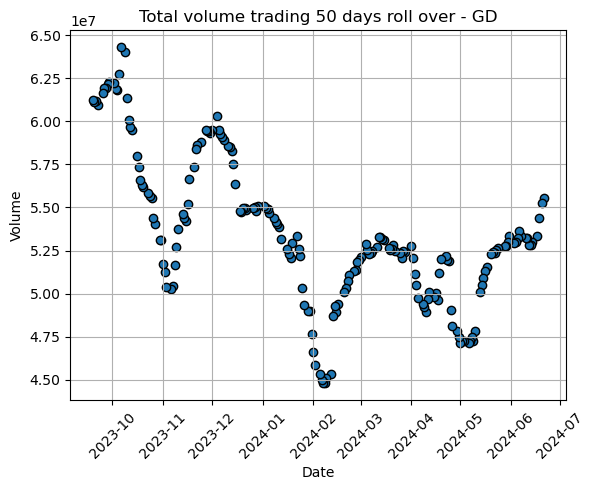

In [6]:
##plot trading volume - GD

# Build scatter plot for latitude vs. temperature
plt.scatter(stock_data_df["Date"], stock_data_df['50_days_volume_GD'], marker='o', edgecolors='black')
plt.xticks(rotation=45)

# Incorporate the other graph properties
plt.title("Total volume trading 50 days roll over - GD")
plt.ylabel("Volume")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot

plt.show()

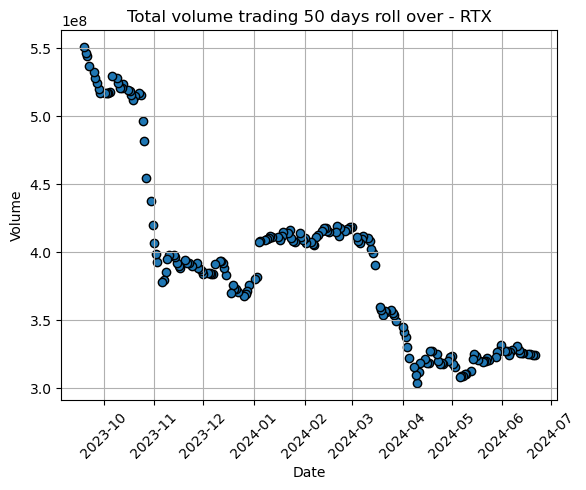

In [7]:
##plot trading volume - RTX

# Build scatter plot for latitude vs. temperature
plt.scatter(stock_data_df["Date"], stock_data_df['50_days_volume_RTX'], marker='o', edgecolors='black')
plt.xticks(rotation=45)

# Incorporate the other graph properties
plt.title("Total volume trading 50 days roll over - RTX")
plt.ylabel("Volume")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot

plt.show()

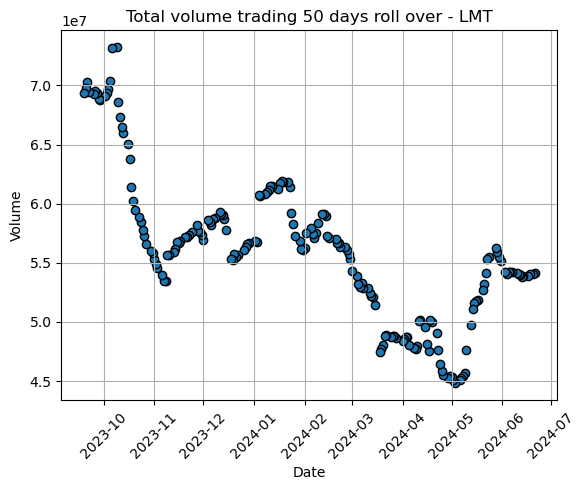

In [8]:
##plot trading volume - LMT

# Build scatter plot for latitude vs. temperature
plt.scatter(stock_data_df["Date"], stock_data_df['50_days_volume_LMT'], marker='o', edgecolors='black')
plt.xticks(rotation=45)

# Incorporate the other graph properties
plt.title("Total volume trading 50 days roll over - LMT")
plt.ylabel("Volume")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot

plt.show()

<Axes: title={'center': 'Monthly volatility Comparison'}, xlabel='Date'>

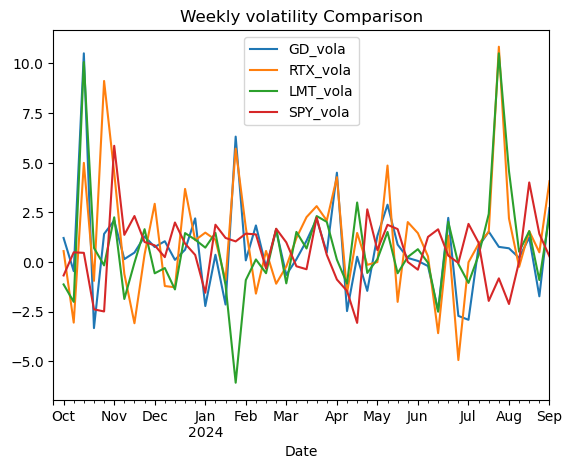

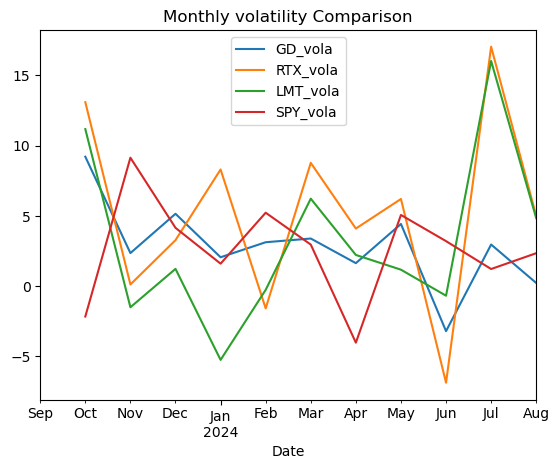

In [9]:
## check Volatility on weekly, monthly period

# Set the 'Date' column as the index
stock_data_df.set_index('Date', inplace=True)


# Resample to Weekly and Monthly
weekly_df = stock_data_df.resample('W').last()
monthly_df = stock_data_df.resample('ME').last()

# Calculate Weekly ROC
weekly_df['GD_vola'] = ((weekly_df['Close_GD'] / weekly_df['Close_GD'].shift(1)) - 1) * 100
weekly_df['RTX_vola'] = ((weekly_df['Close_RTX'] / weekly_df['Close_RTX'].shift(1)) - 1) * 100
weekly_df['LMT_vola'] = ((weekly_df['Close_LMT'] / weekly_df['Close_LMT'].shift(1)) - 1) * 100
weekly_df['SPY_vola'] = ((weekly_df['Close_SPY'] / weekly_df['Close_SPY'].shift(1)) - 1) * 100

# Calculate Monthly ROC
monthly_df['GD_vola'] = ((monthly_df['Close_GD'] / monthly_df['Close_GD'].shift(1)) - 1) * 100
monthly_df['RTX_vola'] = ((monthly_df['Close_RTX'] / monthly_df['Close_RTX'].shift(1)) - 1) * 100
monthly_df['LMT_vola'] = ((monthly_df['Close_LMT'] / monthly_df['Close_LMT'].shift(1)) - 1) * 100
monthly_df['SPY_vola'] = ((monthly_df['Close_SPY'] / monthly_df['Close_SPY'].shift(1)) - 1) * 100

# Combine the results for comparison
comparison_weekly = weekly_df[['GD_vola', 'RTX_vola', 'LMT_vola', 'SPY_vola']]
comparison_monthly = monthly_df[['GD_vola', 'RTX_vola', 'LMT_vola', 'SPY_vola']]

# Visualize the results
comparison_weekly.plot(title='Weekly volatility Comparison')
comparison_monthly.plot(title='Monthly volatility Comparison')


/var/folders/29/h_3t7s5n0tl9f_c5l2nh7yv00000gn/T/ipykernel_33151/3815134768.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent_weekly_df['GD_percentage'] = (percent_weekly_df['Close_GD'] - percent_weekly_df['Close_GD'][0])/(percent_weekly_df['Close_GD'][0])*100
/var/folders/29/h_3t7s5n0tl9f_c5l2nh7yv00000gn/T/ipykernel_33151/3815134768.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent_weekly_df['RTX_percentage'] = (percent_weekly_df['Close_RTX'] - percent_weekly_df['Close_RTX'][0])/(percent_weekly_df['Close_RTX'][0])*100
/var/folders/29/h_3t7s5n0tl9f_c5l2nh7yv00000gn/T/ipykernel_33151/3815134768.py

<Axes: title={'center': 'Monthly percentage change Comparison'}, xlabel='Date'>

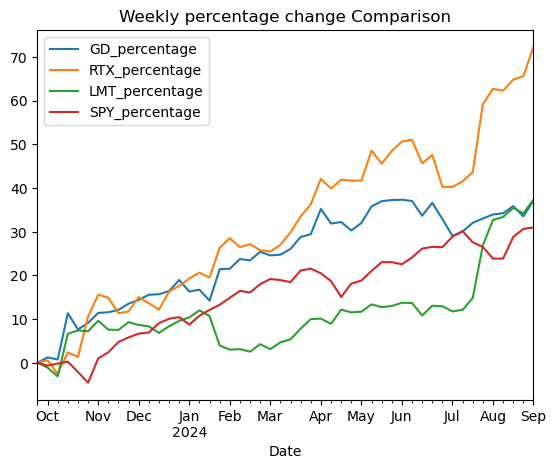

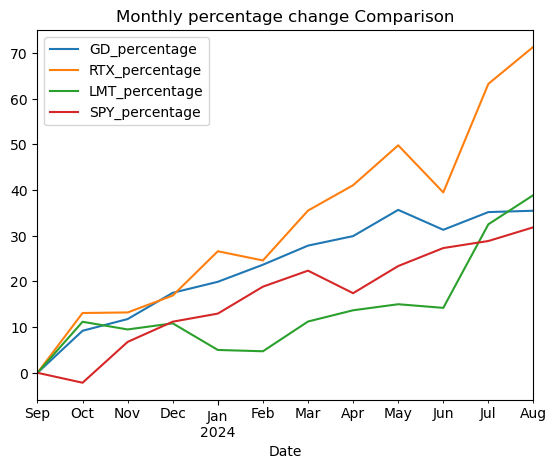

In [10]:
## Visualize the ROC (Rate of Change) per week, month

percent_weekly_df = stock_data_df.resample('W').last()
percent_monthly_df = stock_data_df.resample('ME').last()

# Calculate Weekly ROC roll up
percent_weekly_df['GD_percentage'] = (percent_weekly_df['Close_GD'] - percent_weekly_df['Close_GD'][0])/(percent_weekly_df['Close_GD'][0])*100
percent_weekly_df['RTX_percentage'] = (percent_weekly_df['Close_RTX'] - percent_weekly_df['Close_RTX'][0])/(percent_weekly_df['Close_RTX'][0])*100
percent_weekly_df['LMT_percentage'] = (percent_weekly_df['Close_LMT'] - percent_weekly_df['Close_LMT'][0])/(percent_weekly_df['Close_LMT'][0])*100
percent_weekly_df['SPY_percentage'] = (percent_weekly_df['Close_SPY'] - percent_weekly_df['Close_SPY'][0])/(percent_weekly_df['Close_SPY'][0])*100

# Calculate Monthly ROC
percent_monthly_df['GD_percentage'] = (percent_monthly_df['Close_GD'] - percent_monthly_df['Close_GD'][0])/(percent_monthly_df['Close_GD'][0])*100
percent_monthly_df['RTX_percentage'] = (percent_monthly_df['Close_RTX'] - percent_monthly_df['Close_RTX'][0])/(percent_monthly_df['Close_RTX'][0])*100
percent_monthly_df['LMT_percentage'] = (percent_monthly_df['Close_LMT'] - percent_monthly_df['Close_LMT'][0])/(percent_monthly_df['Close_LMT'][0])*100
percent_monthly_df['SPY_percentage'] = (percent_monthly_df['Close_SPY'] - percent_monthly_df['Close_SPY'][0])/(percent_monthly_df['Close_SPY'][0])*100

# Combine the results for comparison
comparison_percent_weekly = percent_weekly_df[['GD_percentage', 'RTX_percentage', 'LMT_percentage', 'SPY_percentage']]
comparison_percent_monthly = percent_monthly_df[['GD_percentage', 'RTX_percentage', 'LMT_percentage', 'SPY_percentage']]


# Visualize the results
comparison_percent_weekly.plot(title='Weekly percentage change Comparison')
comparison_percent_monthly.plot(title='Monthly percentage change Comparison')

